# Kaggle project
## Data understanding


In [1]:
! pip install sweetviz

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [3]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
for key,value in dict(df_train.isnull().sum()).items():
  if int(value)>0:
    print(key,(value/df_train.shape[0])*100)

LotFrontage 17.73972602739726
Alley 93.76712328767123
MasVnrType 0.547945205479452
MasVnrArea 0.547945205479452
BsmtQual 2.5342465753424657
BsmtCond 2.5342465753424657
BsmtExposure 2.6027397260273974
BsmtFinType1 2.5342465753424657
BsmtFinType2 2.6027397260273974
Electrical 0.0684931506849315
FireplaceQu 47.26027397260274
GarageType 5.5479452054794525
GarageYrBlt 5.5479452054794525
GarageFinish 5.5479452054794525
GarageQual 5.5479452054794525
GarageCond 5.5479452054794525
PoolQC 99.52054794520548
Fence 80.75342465753424
MiscFeature 96.30136986301369


### Removing columns which have missing values more then 80% and try to impute the missing values of the remaing dataset

In [6]:
columns_to_remove = ["Alley","PoolQC","Fence","MiscFeature"]

In [7]:
df_train.drop(columns_to_remove,axis = 1,inplace = True )
df_test.drop(columns_to_remove,axis = 1,inplace = True)

In [8]:
## Checking if the columns are removed
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

## Impute missing values with simple Mean, Mode and Later will be using some complex methods KNN.

In [9]:
#
for key,value in dict(df_train.isnull().sum()).items():

  if int(value)>0:
    try:
      df_train[key].fillna(df_train[key].mean(),inplace=True)
      print("Imputed Using Mean for column:",key)
    except:
      df_train[key].fillna(df_train[key].mode()[0], inplace=True)
      print("Impurted using Mode for column:",key)

for key,value in dict(df_test.isnull().sum()).items():

  if int(value)>0:
    try:
      df_test[key].fillna(df_test[key].mean(),inplace=True)
      print("Imputed Using Mean for column:",key)
    except:
      df_test[key].fillna(df_test[key].mode()[0], inplace=True)
      print("Impurted using Mode for column:",key)

Imputed Using Mean for column: LotFrontage
Impurted using Mode for column: MasVnrType
Imputed Using Mean for column: MasVnrArea
Impurted using Mode for column: BsmtQual
Impurted using Mode for column: BsmtCond
Impurted using Mode for column: BsmtExposure
Impurted using Mode for column: BsmtFinType1
Impurted using Mode for column: BsmtFinType2
Impurted using Mode for column: Electrical
Impurted using Mode for column: FireplaceQu
Impurted using Mode for column: GarageType
Imputed Using Mean for column: GarageYrBlt
Impurted using Mode for column: GarageFinish
Impurted using Mode for column: GarageQual
Impurted using Mode for column: GarageCond
Impurted using Mode for column: MSZoning
Imputed Using Mean for column: LotFrontage
Impurted using Mode for column: Utilities
Impurted using Mode for column: Exterior1st
Impurted using Mode for column: Exterior2nd
Impurted using Mode for column: MasVnrType
Imputed Using Mean for column: MasVnrArea
Impurted using Mode for column: BsmtQual
Impurted us

In [10]:
## checking if missing values are imputed properly
dict(df_train.isnull().sum())

{'Id': 0,
 'MSSubClass': 0,
 'MSZoning': 0,
 'LotFrontage': 0,
 'LotArea': 0,
 'Street': 0,
 'LotShape': 0,
 'LandContour': 0,
 'Utilities': 0,
 'LotConfig': 0,
 'LandSlope': 0,
 'Neighborhood': 0,
 'Condition1': 0,
 'Condition2': 0,
 'BldgType': 0,
 'HouseStyle': 0,
 'OverallQual': 0,
 'OverallCond': 0,
 'YearBuilt': 0,
 'YearRemodAdd': 0,
 'RoofStyle': 0,
 'RoofMatl': 0,
 'Exterior1st': 0,
 'Exterior2nd': 0,
 'MasVnrType': 0,
 'MasVnrArea': 0,
 'ExterQual': 0,
 'ExterCond': 0,
 'Foundation': 0,
 'BsmtQual': 0,
 'BsmtCond': 0,
 'BsmtExposure': 0,
 'BsmtFinType1': 0,
 'BsmtFinSF1': 0,
 'BsmtFinType2': 0,
 'BsmtFinSF2': 0,
 'BsmtUnfSF': 0,
 'TotalBsmtSF': 0,
 'Heating': 0,
 'HeatingQC': 0,
 'CentralAir': 0,
 'Electrical': 0,
 '1stFlrSF': 0,
 '2ndFlrSF': 0,
 'LowQualFinSF': 0,
 'GrLivArea': 0,
 'BsmtFullBath': 0,
 'BsmtHalfBath': 0,
 'FullBath': 0,
 'HalfBath': 0,
 'BedroomAbvGr': 0,
 'KitchenAbvGr': 0,
 'KitchenQual': 0,
 'TotRmsAbvGrd': 0,
 'Functional': 0,
 'Fireplaces': 0,
 'Fireplac

In [11]:
## checking if missing values are imputed properly
dict(df_train.dtypes)

{'Id': dtype('int64'),
 'MSSubClass': dtype('int64'),
 'MSZoning': dtype('O'),
 'LotFrontage': dtype('float64'),
 'LotArea': dtype('int64'),
 'Street': dtype('O'),
 'LotShape': dtype('O'),
 'LandContour': dtype('O'),
 'Utilities': dtype('O'),
 'LotConfig': dtype('O'),
 'LandSlope': dtype('O'),
 'Neighborhood': dtype('O'),
 'Condition1': dtype('O'),
 'Condition2': dtype('O'),
 'BldgType': dtype('O'),
 'HouseStyle': dtype('O'),
 'OverallQual': dtype('int64'),
 'OverallCond': dtype('int64'),
 'YearBuilt': dtype('int64'),
 'YearRemodAdd': dtype('int64'),
 'RoofStyle': dtype('O'),
 'RoofMatl': dtype('O'),
 'Exterior1st': dtype('O'),
 'Exterior2nd': dtype('O'),
 'MasVnrType': dtype('O'),
 'MasVnrArea': dtype('float64'),
 'ExterQual': dtype('O'),
 'ExterCond': dtype('O'),
 'Foundation': dtype('O'),
 'BsmtQual': dtype('O'),
 'BsmtCond': dtype('O'),
 'BsmtExposure': dtype('O'),
 'BsmtFinType1': dtype('O'),
 'BsmtFinSF1': dtype('int64'),
 'BsmtFinType2': dtype('O'),
 'BsmtFinSF2': dtype('int64')

<Axes: >

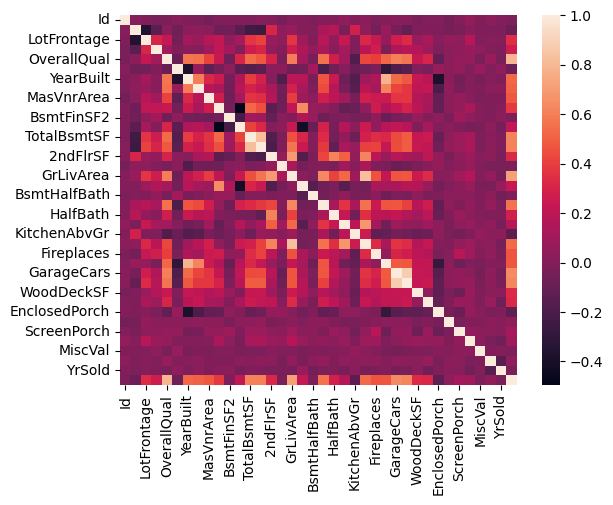

In [12]:
# calculate the correlation matrix on the numeric columns
corr = df_train.select_dtypes('number').corr()

# plot the heatmap
sns.heatmap(corr)

In [13]:
df_train.corr(numeric_only=True).to_csv("Cor.csv")

## No significant correlation present which are more then 95% but the ones which are 80%
## correlated we will be handling it in our model implimentation

In [14]:
## EDA
import pandas as pd

my_dataframe = pd.read_csv("train.csv")
import sweetviz as sv

my_report = sv.analyze(my_dataframe)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [15]:
### Pre-Processing of Data before modeling data
from sklearn.preprocessing import LabelEncoder

In [16]:
for values in df_train.columns:
  if df_train[values].dtype=="O":
    le = LabelEncoder()
    le.fit(df_train[values])
    df_train[values] = le.transform(df_train[values])

for values in df_test.columns:
  if df_test[values].dtype=="O":
    le = LabelEncoder()
    le.fit(df_test[values])
    df_test[values] = le.transform(df_test[values])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df_train.drop(['SalePrice'],axis=1),df_train['SalePrice'], test_size=0.20, random_state=1)

In [18]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn import metrics

#Lasso
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train)

pred_test_lasso= model_lasso.predict(X_test)

In [19]:
print('Root Mean Squared Error:', metrics.mean_squared_log_error(pred_test_lasso, y_test))

Root Mean Squared Error: 0.03130528595203469


In [20]:
from sklearn.model_selection import cross_val_score

In [25]:
reg_model = Lasso(alpha=0.01)

In [22]:
import numpy as np
from sklearn.metrics import make_scorer

def mse_logerror(y_true, y_pred):
    # Calculate the mean of the true values
    res = metrics.mean_squared_log_error(y_true, y_pred)

    return res

from sklearn.metrics import make_scorer

mse_lerror = make_scorer(mse_logerror)
mse_lerror

make_scorer(mse_logerror)

In [23]:
scores = cross_val_score(reg_model,X_train, y_train, cv=10,scoring=mse_lerror)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.414e+10, tolerance: 6.372e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.789e+10, tolerance: 6.276e+08
  model = cd_fast.enet_coordinate_descent(


In [24]:
scores

array([0.02827826, 0.04901126, 0.03205777, 0.03555418, 0.02972263,
       0.0636618 , 0.02060277, 0.0268303 , 0.01790996, 0.01513881])

In [ ]:
### Creating final model

In [26]:
reg_model = Lasso(alpha=0.01)

reg_model.fit(df_train.drop(['SalePrice'],axis=1),df_train['SalePrice'])

pred_test_lasso= reg_model.predict(df_test)

In [27]:
pred_test_lasso

array([104216.18059811, 150375.09205063, 164566.34744438, ...,
       137334.76693357, 111205.26902784, 237919.38671855])

In [30]:
df_Final_pred = pd.DataFrame({"Id":df_test["Id"],"SalePrice":pred_test_lasso})

In [31]:
df_Final_pred.to_csv("busyqa_1stdraft.csv",index = False)